In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 29 09:11:31 2018

@author: Prof Marcelino Andrade
Universidade de Brasilia - UnB
"""
%matplotlib notebook 
import matplotlib.dates as mdates
from matplotlib.finance import candlestick_ohlc
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
import datetime as dt
import matplotlib.ticker as mticker
sns.set()

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()        
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

Stocks=['BBAS3','LCAM3', 'TECN3','NATU4']
Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

N_months=10
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

[*********************100%***********************]  4 of 4 downloaded


In [8]:
stocks_all.head()

Open                         High                    \
             BBAS3.SA LCAM3.SA TECN3.SA   BBAS3.SA LCAM3.SA TECN3.SA   
Date                                                                   
2017-11-28  32.560001    15.51     4.04  32.990002    15.66     4.04   
2017-11-29  32.720001    15.31     3.91  32.900002    15.51     4.14   
2017-11-30  31.100000    15.78     4.11  31.100000    15.78     4.11   
2017-12-01  29.950001    15.59     3.93  30.840000    15.59     3.93   
2017-12-04  31.000000    15.10     3.85  31.980000    15.16     3.87   

                  Low                        Close                    \
             BBAS3.SA LCAM3.SA TECN3.SA   BBAS3.SA LCAM3.SA TECN3.SA   
Date                                                                   
2017-11-28  32.220001    15.35     3.90  32.639999    15.51     3.95   
2017-11-29  31.160000    15.21     3.91  31.160000    15.48     4.12   
2017-11-30  29.930000    15.14     3.83  29.930000    15.60     4.00   
2017-12-01  29.620001    14.88     3.87  30.780001    15.00     3.90   
2017-12-04  30.910000    14.88     3.72  31.530001    14.88     3.72   

            Adj Close                        Volume                    
             BBAS3.SA   LCAM3.SA TECN3.SA  BBAS3.SA LCAM3.SA TECN3.SA  
Date                                                                   
2017-11-28  32.106030  15.116565     3.95   7342500    19400   239800  
2017-11-29  30.650244  15.087326     4.12  12881300     7700    65800  
2017-11-30  29.440365  15.204283     4.00  16008700    28400   410700  
2017-12-01  30.276461  14.619502     3.90  11157000    38800   240800  
2017-12-04  31.014193  14.502547     3.72   8429700     7700   262500

In [7]:
stocks_all.head()
stock=pd.concat([ stocks_all.Open[Stocks[0]], stocks_all.High[Stocks[0]], stocks_all.Low[Stocks[0]], stocks_all.Close[Stocks[0]], 
              stocks_all.Volume[Stocks[0]]] , axis=1)  
stock.columns=['Open','High','Low','Close','Volume']
stock.head()

Open       High        Low      Close    Volume
Date                                                            
2017-11-28  32.560001  32.990002  32.220001  32.639999   7342500
2017-11-29  32.720001  32.900002  31.160000  31.160000  12881300
2017-11-30  31.100000  31.100000  29.930000  29.930000  16008700
2017-12-01  29.950001  30.840000  29.620001  30.780001  11157000
2017-12-04  31.000000  31.980000  30.910000  31.530001   8429700

<IPython.core.display.Javascript object>


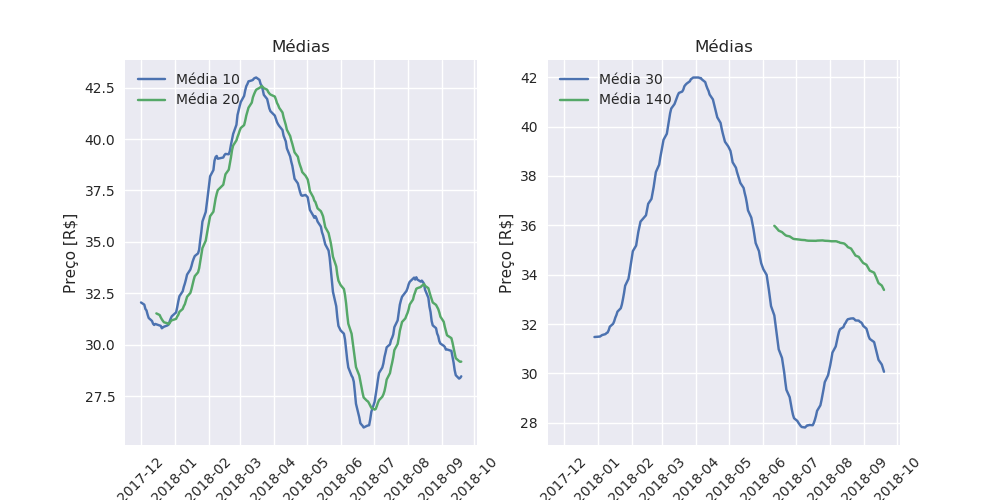

In [77]:
%matplotlib notebook 
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))

stock['10'] = stock['Close'].rolling(window=10).mean()
stock['20'] = stock['Close'].rolling(window=20).mean()
stock['30'] = stock['Close'].rolling(window=30).mean()
stock['140'] = stock['Close'].rolling(window=140).mean()

ax[0].plot(stock['10'], label='Média 10')
ax[0].plot(stock['20'],label='Média 20')
ax[1].plot(stock['30'], label='Média 30')
ax[1].plot(stock['140'],label='Média 140')
for tick in ax[0].get_xticklabels():
    tick.set_rotation(45)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(45)

ax[0].set_ylabel("Preço [R$]")
ax[0].set_xlabel("Data")
ax[0].set_title("Médias")
ax[0].legend(loc='upper left')
ax[1].set_ylabel("Preço [R$]")
ax[1].set_xlabel("Data")
ax[1].set_title("Médias")
ax[1].legend(loc='upper left')

# Show plot


<IPython.core.display.Javascript object>


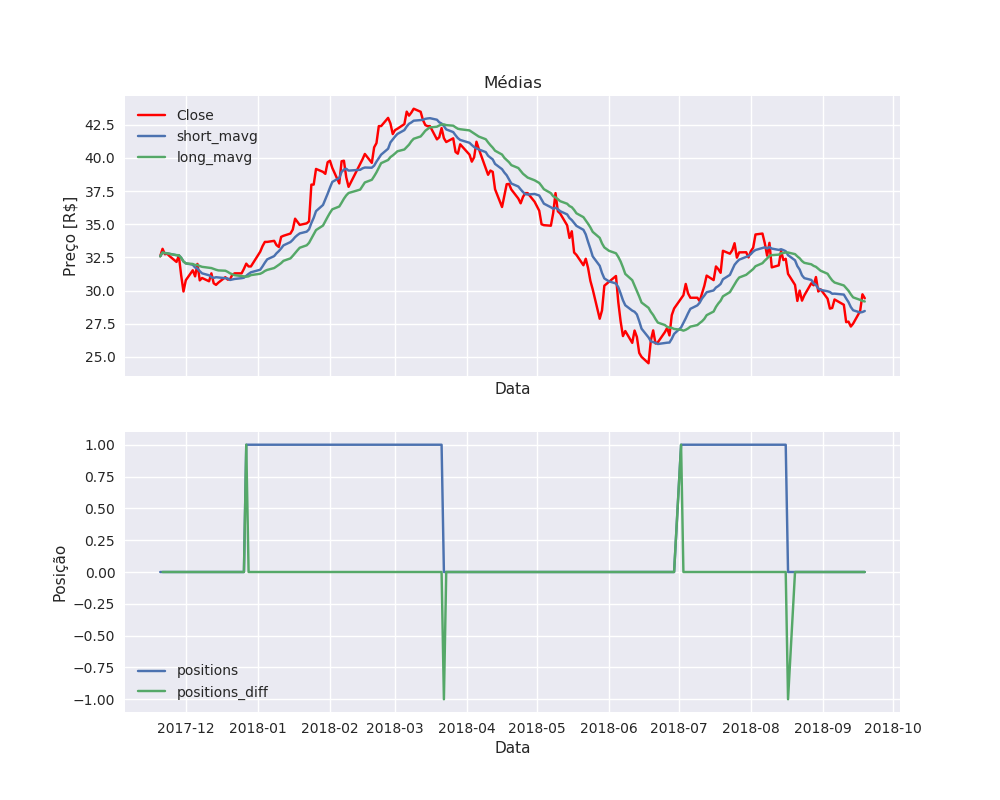

In [80]:
%matplotlib notebook 
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,8))


short_window = 10
long_window = 21

# Inicia sinal DataFrame
signals = pd.DataFrame(index=stock.index)

signals['signal'] = 0.0

# Média Rápida
signals['short_mavg'] = stock['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Média Longa
signals['long_mavg'] = stock['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Sinal de Entrada
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   
# Posição dos trades
signals['positions'] = signals['signal']
signals['positions_diff'] = signals['signal'].diff()

ax[0].plot(stock['Close'], label='Close',color='r')
ax[0].plot(signals['short_mavg'], label='short_mavg')
ax[0].plot(signals['long_mavg'], label='long_mavg')
ax[0].set_ylabel("Preço [R$]")
ax[0].set_xlabel("Data")
ax[0].set_title("Médias")
ax[0].legend(loc='upper left')

ax[1].plot(signals['positions'], label='positions')
ax[1].plot(signals['positions_diff'], label='positions_diff')
ax[1].set_ylabel("Posição")
ax[1].set_xlabel("Data")
ax[1].legend(loc='lower left')


<IPython.core.display.Javascript object>


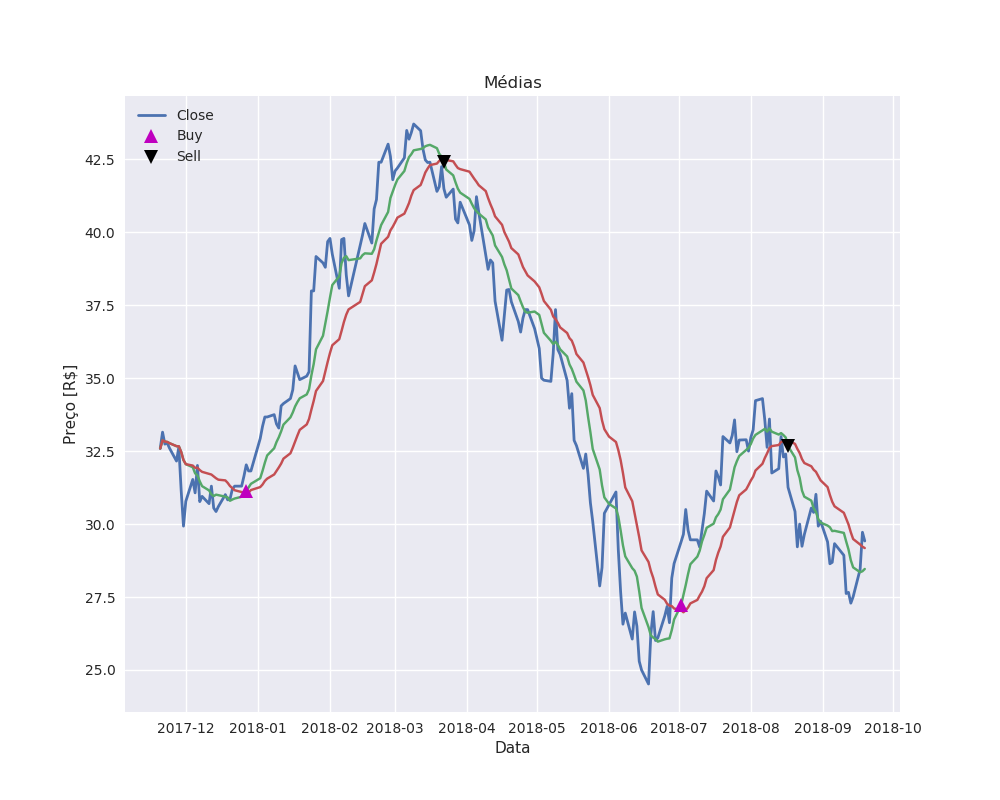

In [334]:
%matplotlib notebook 

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10,8))

# Close
ax1.plot(stock['Close'], lw=2.,label='Close')

# Médias
ax1.plot(signals[['short_mavg', 'long_mavg']])

# Compra
ax1.plot(signals.loc[signals.positions_diff == 1.0].index, 
         signals.short_mavg[signals.positions_diff == 1.0],
         '^', markersize=10, color='m',label='Buy')
         
# venda
ax1.plot(signals.loc[signals.positions_diff == -1.0].index, 
         signals.short_mavg[signals.positions_diff == -1.0],
         'v', markersize=10, color='k',label='Sell')
ax1.legend(loc='lower left')      


ax1.set_ylabel("Preço [R$]")
ax1.set_xlabel("Data")
ax1.set_title("Médias")
ax1.legend(loc='upper left')


# Show the plot
plt.show()

<IPython.core.display.Javascript object>


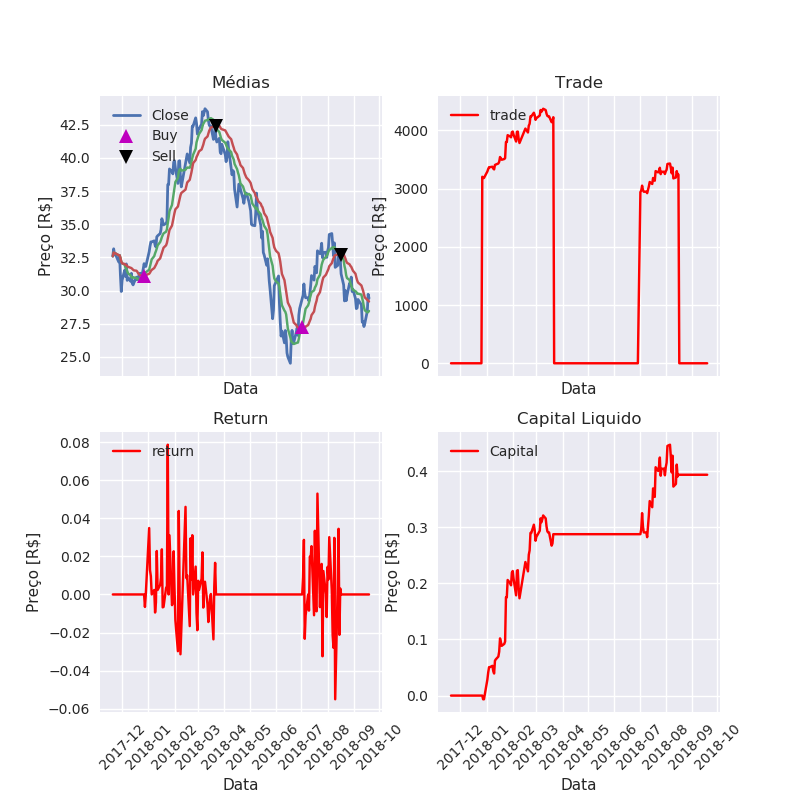

In [339]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(8,8))
# Close
ax[0,0].plot(stock['Close'], lw=2.,label='Close')

# Médias
ax[0,0].plot(signals[['short_mavg', 'long_mavg']])

# Compra
ax[0,0].plot(signals.loc[signals.positions_diff == 1.0].index, 
         signals.short_mavg[signals.positions_diff == 1.0],
         '^', markersize=10, color='m',label='Buy')
         
# venda
ax[0,0].plot(signals.loc[signals.positions_diff == -1.0].index, 
         signals.short_mavg[signals.positions_diff == -1.0],
         'v', markersize=10, color='k',label='Sell')
   

ax[0,0].set_ylabel("Preço [R$]")
ax[0,0].set_xlabel("Data")
ax[0,0].set_title("Médias")
ax[0,0].legend(loc='upper left')
# Valor da ação
initial_capital= 100*float(stock['Close'][0])

# DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)
# Comprar a 100 ações

positions['AAA'] = 100*signals['signal']   

# Periodo de trades

portfolio['holdings'] = positions.multiply(stock['Close'], axis=0)
ax[0,1].plot(portfolio['holdings'], label='trade',color='r')

ax[0,1].set_ylabel("Preço [R$]")
ax[0,1].set_xlabel("Data")
ax[0,1].set_title("Trade")
ax[0,1].legend(loc='upper left')


# Retornos
portfolio['return'] = portfolio['holdings'].pct_change().fillna(0)
portfolio['return'][np.where(positions.diff()<0)[0]]=0
portfolio['return']=portfolio['return'].replace(np.inf,0)
ax[1,0].plot(portfolio['return'], label='return',color='r')
for tick in ax[1,0].get_xticklabels():
    tick.set_rotation(45)
    
ax[1,0].set_ylabel("Preço [R$]")
ax[1,0].set_xlabel("Data")
ax[1,0].set_title("Return")
ax[1,0].legend(loc='upper left')    
    
    
#capital
portfolio['capital']=portfolio['return'].cumsum()
ax[1,1].plot(portfolio['capital'], label='Capital',color='r')
for tick in ax[1,1].get_xticklabels():
    tick.set_rotation(45)

ax[1,1].set_ylabel("Preço [R$]")
ax[1,1].set_xlabel("Data")
ax[1,1].set_title("Capital Liquido")
ax[1,1].legend(loc='upper left')      
    

In [340]:
[stock['Close'].pct_change().sum()/stock['Close'].pct_change().std(),portfolio['returns'].sum()/portfolio['returns'].std()]

[-1.718466460115639, 25.879541472313964]